In [2]:
import numpy as np
import random
from queue import PriorityQueue
import heapq
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def Create_Grid(n , m):
    
    print("Creating Grid\n")
    
    #Creating a 2D-List for the grid
    Grid = [[0 for i in range(int(Width))] for j in range(int(Height))]
    
    return Grid

In [4]:
def Populate_Grid(Game_Grid, n, m):
    for i in range(n):
        for j in range(m):
            #placing a random number in range of 0 to 9 on the grid
            Game_Grid[i][j] = random.randint(0,9)
            
    return Game_Grid

In [5]:
def Print_Grid(Game_Grid, n, m):
    for i in range(n):
        for k in range(m*3):
                print("_",end = "")
        print()
        for j in range(m):
            print("|",Game_Grid[i][j], end = "" )
        print("|")
    for k in range(m*3):
            print("_",end = "")
    print("\n")

In [6]:
def Path_Taken_Visual(Game_Grid, n, m,path):
    count = 0
    flg = 0
    for i in range(n):
        for k in range(m*3):
                print("_",end = "")
        print()
        for j in range(m):
            for cell in path:
                if(int(cell) == count):
                    flg = 1
            if(flg == 1):
                print("|","@", end = "" )
                flg=0
            else:
                print("|",Game_Grid[i][j], end = "" )
            count = count + 1
        print("|")
    for k in range(m*3):
            print("_",end = "")
    print("\n")
    

In this approach the agent start at Grid(0,0) at the left top corner and make it's way down to right bottom corner of the grid. Since we are going downwards and moving from left to right, the agent checks 3 adjacent grid blocks, the one on the right, the one on the bottom and the diagonal one on the right bottom. The agent checks the smallest among the three and moves onto that, until it has reached it's destination at the last cell of the grid.

In [7]:
def shortest_path(Game_Grid, n, m):
    path_list = [] #a list to store the path the agent takes to reach destination
    next_i=0
    next_j=0
    min_num = 99
    print("Current cell is:",Game_Grid[0][0] , "Index i: 0" ,"Index j: 0")
    for i in range(n):
        for j in range(m):
            if(i==0 and j==0):

                current_num = Game_Grid[i][j]
                
                #Adding the minimum number to the path list
                path_list.append(0)

                #Checking the cell at the right 
                Right = Game_Grid[i][j+1]
                if(min_num >= Right):
                    min_num = Right
                    next_i=i
                    next_j=j+1
                    print("Choose the cell at right")
                    
                #Checking the cell at bottom  
                Bottom = Game_Grid[i+1][j]
                if(min_num >= Bottom):
                    min_num = Bottom
                    next_i=i+1
                    next_j=j
                    print("Choose the cell at Bottom")

                #checking the diagonal cell at the right bottom
                Bottom_Right = Game_Grid[i+1][j+1]
                if(min_num >= Bottom_Right):
                    min_num = Bottom_Right
                    next_i=i+1
                    next_j=j+1
                    print("Choose the cell at Bottom_Right")

            else:
                
                #this condition breaks the loop if destination is reached
                if(next_i == n-1 and next_j == m-1):
                    break
                
                temp_i=next_i
                temp_j=next_j

                current_num = Game_Grid[next_i][next_j]
                print("Next cell is:",current_num , "Index i:",next_i ,"Index j:",next_j)
                
                #Adding the minimum number to the path list
                path_list.append(((next_i*m)+next_j))

                min_num = 99 #set minimum to a highest number 

                #Checking the cell at the right 
                if(next_j < m-1):#checking if not out f bound of the matrix
                    Right = Game_Grid[next_i][next_j+1]
                    if(min_num >= Right):
                        min_num = Right #selecting a new minimum number 
                        temp_i=next_i
                        temp_j=next_j+1
                        print("Choose the cell at right")
                        
                #Checking the cell at the Bottom 
                if(next_i < n-1): #checking if not out f bound of the matrix
                    Bottom = Game_Grid[next_i+1][next_j]
                    if(min_num >= Bottom):
                        min_num = Bottom #selecting a new minimum number 
                        temp_i=next_i+1
                        temp_j=next_j
                        print("Choose the cell at Bottom")

                
                #Checking the cell at the Bottom_Right 
                if(next_i < n-1 and next_j < m-1):#checking if not out f bound of the matrix
                    Bottom_Right = Game_Grid[next_i+1][next_j+1]
                    if(min_num >= Bottom_Right):
                        min_num = Bottom_Right #selecting a new minimum number 
                        temp_i=next_i+1
                        temp_j=next_j+1
                        print("Choose the cell at Bottom_Right")
                
                #setting new i and j values 
                next_i=temp_i
                next_j=temp_j

    print("Next cell is:",current_num , "Index i:",next_i ,"Index j:",next_j,"\n\n")        
    path_list.append(((next_i*m)+next_j))
    return path_list

In [8]:
#In this function we store the whole grid as a graph. We are going to assign each cell of the grid a number. Suppose if the grid 
# is 5x5, that means there are 24 elements in the grid from 0 to 24. we assign each corresponding cell that number, take it's 
# 4 neigbours (up,down,left,right), and assign them the the value stored at the position as it's weight or distance, in the 
# graph as edges.

def Conver_Grid_to_Graph(Grid,h,w):
    Grid_graph = { } #creating dictionary
    count = 0
    for i in range(h):
        for j in range(w):
            Grid_graph[str(count)] = {} #creating nested dictionary

            #top  cell block
            if(i > 0):#checking if not out of bounds
                up = Grid[i-1][j]
                Grid_graph[str(count)][str(abs(count-w))] = up #Storing in the dictionary as a neighbour

            #bottom  cell block
            if(i < h-1):  #checking if not out of bounds
                down = Grid[i+1][j]
                Grid_graph[str(count)][str(abs(count+w))] = down #Storing in the dictionary as a neighbour

            #right cell block
            if(j < w-1): #checking if not out of bounds
                right = Grid[i][j+1]
                Grid_graph[str(count)][str(abs(count+1))] = right #Storing in the dictionary as a neighbour

            #left cell block
            if(j > 0): #checking if not out of bounds
                left = Grid[i][j-1]
                Grid_graph[str(count)][str(abs(count-1))] = left #Storing in the dictionary as a neighbour

            count = count + 1
        
    return Grid_graph

In [9]:
def Dijkstra_Algo(graph, start,end):
    Distances = {start: 0}
    visited = set()
    Path = {start: None}
    queue = PriorityQueue()
    queue.put((0, start))
    
    while queue:
        _, edge = queue.get() # finds lowest cost edge of the graph
        
        if edge in visited: #if taht edge has already been visited we do not need to loop again
            continue
        
        visited.add(edge)#if edge is not visited, just add it to the visited set


        if edge == end: #If our goal has been found, exit the loop
            break


        for neighbor, distance in graph[edge].items():
            if neighbor in visited: 
                continue # we don't want to go over the alrady visted edges again, so we'll just skip them to save time
            max_dist = Distances.get(neighbor, float('inf')) #to choose a new minimun distance we set the ma distance to infinity and is by default infinity
            new_dist = Distances[edge] + distance
            if new_dist < max_dist: #if a new minimum distance is found, add that to the queue and update the distance to that neighbour
                queue.put((new_dist, neighbor))
                Distances[neighbor] = new_dist
                Path[neighbor] = edge

    return Path

In [10]:
def Optimal_path_finder(path, end):
    if end not in path:
        return None
    vertex = end
    temp = vertex
    temp_list = []
    temp = temp + vertex
    temp = temp + end
    short_path = []
    while vertex is not None:
        short_path.append(vertex)
        temp = temp + vertex
        vertex = path[vertex]
    return short_path[::-1]

In [11]:
#this function recives the shortest past found, takes the distance on that path, sum that distance and return the total shortest distance 
def get_total_dist(shortest_path,Game_Grid):
    path_len = 0
    count=0
    for i in range(n):
        for j in range(m):
            for d in shortest_path:
                if(count == int(d)):
                    path_len = path_len + Game_Grid[i][j]
            count = count + 1
    
    return path_len

In [12]:
#this function recives the shortest past found, takes the distance on that path, sum that distance and return the total shortest distance 
def get_timeline(shortest_path,Game_Grid):
    path_len = 0
    count=0
    timestep = []
    for i in range(n):
        for j in range(m):
            for d in shortest_path:
                if(count == int(d)):
                    path_len = path_len + Game_Grid[i][j]
                    timestep.append(path_len)
            count = count + 1
    
    return timestep

In [13]:
#This function display the index of the of cell, the time step spent on that cell
def Print_Path_Taken(Game_Grid, n, m,path):
    count = 0
    for i in range(n):
        for j in range(m):
            for cell in path:
                if(count == int(cell)):
                    print("(", i," , ", j,")" ," : ", Game_Grid[i][j])
            count = count + 1

In [14]:
#Taking input for creating a variable size grid 

print("Kindly input Height and Width of the grid")
Height = input("Height: ")
Width = input("Width: ")


n = int(Height)
m = int(Width)

#creating the grid as required by the user
Game_Grid = Create_Grid(n,m)

print("Game Grid of : ", n , " x ", m, "Created Sucessfully\n\n")

print("Populating Grid the grid with random values\n\n")

#This function populates the grid with random values
Game_Grid = Populate_Grid(Game_Grid, n, m)

#printing the grid
Print_Grid(Game_Grid, n, m)

Kindly input Height and Width of the grid
Height: 6
Width: 7
Creating Grid

Game Grid of :  6  x  7 Created Sucessfully


Populating Grid the grid with random values


_____________________
| 7| 6| 3| 2| 6| 6| 2|
_____________________
| 1| 1| 4| 7| 4| 3| 7|
_____________________
| 6| 5| 3| 1| 2| 9| 6|
_____________________
| 8| 0| 5| 1| 2| 0| 1|
_____________________
| 9| 9| 0| 2| 6| 8| 8|
_____________________
| 8| 9| 3| 7| 4| 4| 3|
_____________________



In [14]:
print("Iterating the grid to find the shortest path using a basic algorithm\n\n")
#Naive approach for shortest path
shortest_path_list = shortest_path(Game_Grid, n, m)

print("The shortest path is : ", shortest_path_list , "\n\n")

print("The path taken in form of (Cell index i, cell index j) : Time step of that cell\n")
Print_Path_Taken(Game_Grid, n, m,shortest_path_list)

print()

p_len_naieve = get_total_dist(shortest_path_list,Game_Grid)
print("Total time it took is: " ,p_len_naieve,"\n\n")

Iterating the grid to find the shortest path using a basic algorithm


Current cell is: 3 Index i: 0 Index j: 0
Choose the cell at right
Next cell is: 4 Index i: 0 Index j: 1
Choose the cell at right
Choose the cell at Bottom_Right
Next cell is: 3 Index i: 1 Index j: 2
Choose the cell at right
Next cell is: 7 Index i: 1 Index j: 3
Choose the cell at right
Choose the cell at Bottom_Right
Next cell is: 1 Index i: 2 Index j: 4
Choose the cell at right
Choose the cell at Bottom_Right
Next cell is: 2 Index i: 3 Index j: 5
Choose the cell at right
Next cell is: 0 Index i: 3 Index j: 6
Choose the cell at right
Choose the cell at Bottom_Right
Next cell is: 3 Index i: 4 Index j: 7
Choose the cell at right
Choose the cell at Bottom
Choose the cell at Bottom_Right
Next cell is: 1 Index i: 5 Index j: 8
Choose the cell at right
Next cell is: 4 Index i: 5 Index j: 9
Choose the cell at Bottom
Next cell is: 6 Index i: 6 Index j: 9
Choose the cell at Bottom
Next cell is: 4 Index i: 7 Index j: 9
Choose 

In [15]:
print("The path taken by naive algorith : \n")
Path_Taken_Visual(Game_Grid, n, m,shortest_path_list)

The path taken by naive algorith : 

______________________________
| @| @| 7| 6| 6| 4| 8| 7| 8| 8|
______________________________
| 5| 9| @| @| 6| 0| 7| 8| 9| 8|
______________________________
| 9| 7| 8| 9| @| 3| 5| 9| 5| 1|
______________________________
| 1| 0| 7| 3| 5| @| @| 3| 5| 4|
______________________________
| 8| 6| 2| 6| 4| 3| 6| @| 7| 2|
______________________________
| 6| 3| 9| 9| 3| 4| 3| 6| @| @|
______________________________
| 4| 7| 5| 8| 0| 5| 3| 2| 9| @|
______________________________
| 0| 7| 4| 5| 1| 9| 6| 8| 4| @|
______________________________
| 6| 7| 7| 0| 2| 7| 7| 1| 3| @|
______________________________
| 2| 3| 6| 0| 9| 3| 6| 5| 6| @|
______________________________



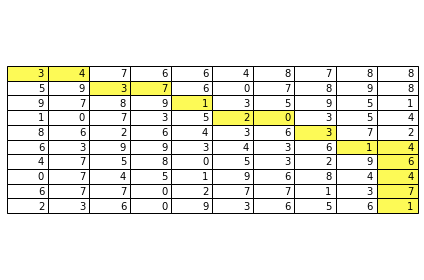

In [16]:
#define figure and axes
fig, ax = plt.subplots()

#hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create data
df = pd.DataFrame(Game_Grid)

#create table
table = ax.table(cellText=df.values, loc='center')

count = 0
for i in range(n):
    for j in range(m):
        for cell in shortest_path_list:
            if(count == int(cell)):
                table[(i, j)].set_facecolor("#fdfa56")
        count = count + 1

fig.tight_layout()
plt.show()

In [17]:
print("Using Dijkstra's Algorithm to find the shortest optimal path\n\n")
print("Converting the 2D grid into a graph based on it's neigbours and weights\n")

#converting the 2D grid into graph
Grid_graph =  Conver_Grid_to_Graph(Game_Grid,n,m)         


print("Printing the Grid Graph : \n")

print("Cell no : ", "{","Neighbouring cell",":","Weight""}","\n")


#loop to print the Grid Graph
for key,val in Grid_graph.items():
    print(key , " : ", val)

Using Dijkstra's Algorithm to find the shortest optimal path


Converting the 2D grid into a graph based on it's neigbours and weights

Printing the Grid Graph : 

Cell no :  { Neighbouring cell : Weight} 

0  :  {'10': 5, '1': 4}
1  :  {'11': 9, '2': 7, '0': 3}
2  :  {'12': 3, '3': 6, '1': 4}
3  :  {'13': 7, '4': 6, '2': 7}
4  :  {'14': 6, '5': 4, '3': 6}
5  :  {'15': 0, '6': 8, '4': 6}
6  :  {'16': 7, '7': 7, '5': 4}
7  :  {'17': 8, '8': 8, '6': 8}
8  :  {'18': 9, '9': 8, '7': 7}
9  :  {'19': 8, '8': 8}
10  :  {'0': 3, '20': 9, '11': 9}
11  :  {'1': 4, '21': 7, '12': 3, '10': 5}
12  :  {'2': 7, '22': 8, '13': 7, '11': 9}
13  :  {'3': 6, '23': 9, '14': 6, '12': 3}
14  :  {'4': 6, '24': 1, '15': 0, '13': 7}
15  :  {'5': 4, '25': 3, '16': 7, '14': 6}
16  :  {'6': 8, '26': 5, '17': 8, '15': 0}
17  :  {'7': 7, '27': 9, '18': 9, '16': 7}
18  :  {'8': 8, '28': 5, '19': 8, '17': 8}
19  :  {'9': 8, '29': 1, '18': 9}
20  :  {'10': 5, '30': 1, '21': 7}
21  :  {'11': 9, '31': 0, '22': 8, '20': 9

In [18]:
print("Running Dijkstra's algorithm on the Graph \n")
end = str((n*m)-1)
path = Dijkstra_Algo(Grid_graph, '0', end)

print("Finding the Optimal Path\n")
shortest_path = Optimal_path_finder(path, end)

print("Optimal Path is : ", shortest_path,"\n")

print("The path taken in form of (Cell index i, cell index j) : Time step of that cell\n")
Print_Path_Taken(Game_Grid, n, m,shortest_path)
print()

p_len_dij = get_total_dist(shortest_path,Game_Grid)
print("Total time it took : " ,p_len_dij,"\n")

Running Dijkstra's algorithm on the Graph 

Finding the Optimal Path

Optimal Path is :  ['0', '10', '20', '30', '31', '41', '42', '43', '44', '54', '64', '74', '84', '85', '86', '87', '88', '98', '99'] 

The path taken in form of (Cell index i, cell index j) : Time step of that cell

( 0  ,  0 )  :  3
( 1  ,  0 )  :  5
( 2  ,  0 )  :  9
( 3  ,  0 )  :  1
( 3  ,  1 )  :  0
( 4  ,  1 )  :  6
( 4  ,  2 )  :  2
( 4  ,  3 )  :  6
( 4  ,  4 )  :  4
( 5  ,  4 )  :  3
( 6  ,  4 )  :  0
( 7  ,  4 )  :  1
( 8  ,  4 )  :  2
( 8  ,  5 )  :  7
( 8  ,  6 )  :  7
( 8  ,  7 )  :  1
( 8  ,  8 )  :  3
( 9  ,  8 )  :  6
( 9  ,  9 )  :  1

Total time it took :  67 



In [19]:
print("The path taken by Dijkstra algorith : \n")
Path_Taken_Visual(Game_Grid, n, m,shortest_path)

The path taken by Dijkstra algorith : 

______________________________
| @| 4| 7| 6| 6| 4| 8| 7| 8| 8|
______________________________
| @| 9| 3| 7| 6| 0| 7| 8| 9| 8|
______________________________
| @| 7| 8| 9| 1| 3| 5| 9| 5| 1|
______________________________
| @| @| 7| 3| 5| 2| 0| 3| 5| 4|
______________________________
| 8| @| @| @| @| 3| 6| 3| 7| 2|
______________________________
| 6| 3| 9| 9| @| 4| 3| 6| 1| 4|
______________________________
| 4| 7| 5| 8| @| 5| 3| 2| 9| 6|
______________________________
| 0| 7| 4| 5| @| 9| 6| 8| 4| 4|
______________________________
| 6| 7| 7| 0| @| @| @| @| @| 7|
______________________________
| 2| 3| 6| 0| 9| 3| 6| 5| @| @|
______________________________



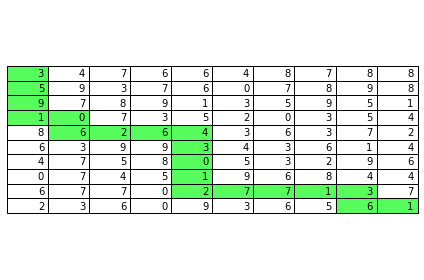

In [20]:
#define figure and axes
fig, ax = plt.subplots()

#hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create data
df = pd.DataFrame(Game_Grid)

#create table
table = ax.table(cellText=df.values, loc='center')

count = 0
for i in range(n):
    for j in range(m):
        for cell in shortest_path:
            if(count == int(cell)):
                table[(i, j)].set_facecolor("#56fd5c")
        count = count + 1

fig.tight_layout()
plt.show()

In [21]:
time_dij = []
time_naive = []
time_dij = get_timeline(shortest_path,Game_Grid)
time_naive = get_timeline(shortest_path_list,Game_Grid)

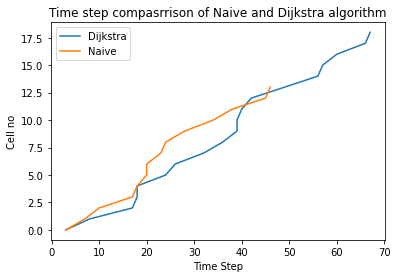

In [22]:
# line of Dijkstra algo
x1 = time_dij
y1 = [x for x in range(len(time_dij))]
plt.plot(x1, y1, label = "Dijkstra")
  
# line of naive algo
x2 = time_naive
y2 = [x for x in range(len(time_naive))]
plt.plot(x2, y2, label = "Naive")
  

plt.xlabel('Time Step')

plt.ylabel('Cell no')

plt.title('Time step compasrrison of Naive and Dijkstra algorithm')

plt.legend()
plt.show()

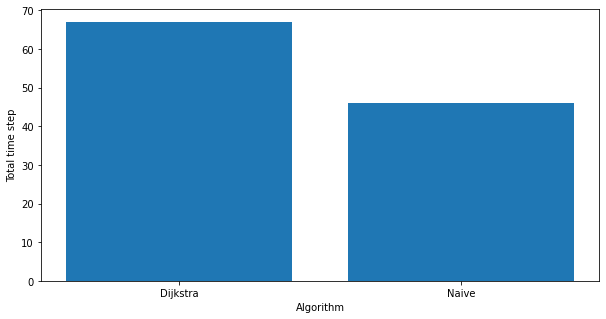

In [23]:
# creating the dataset
data = {'Dijkstra':p_len_dij , 'Naive':p_len_naieve}
Algo = list(data.keys())
Timestep = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Algo, Timestep)
 
plt.xlabel("Algorithm")
plt.ylabel("Total time step")
# plt.title("Students enrolled in different courses")
plt.show()

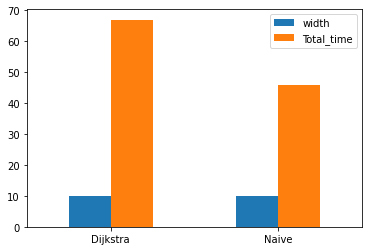

In [24]:
width = [m,m]
Total_time = [p_len_dij,p_len_naieve]
index = ['Dijkstra' , 'Naive']
df = pd.DataFrame({'width': width,
                   'Total_time': Total_time}, index=index)
ax = df.plot.bar(rot=0)

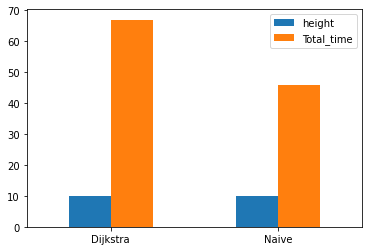

In [25]:
height = [n,n]
Total_time = [p_len_dij,p_len_naieve]
index = ['Dijkstra' , 'Naive']
df = pd.DataFrame({'height': height,
                   'Total_time': Total_time}, index=index)
ax = df.plot.bar(rot=0)

At times the total distance given by naive approach is less than the distance given by Dijkstra. That is because the naive approach moves diagonally and downwards only, straight towards the goal, where as Dijkstra checks all the 8 edges of a cell and move accordingly. 